# Frequency Domain Group

Francisco Freitas

Leonor Jesus

Matteo Caranchini

Rodrigo Alves

# Generalized Code

Receive as an imput k,B,M, a function in the time domain and the max frequency that we want to plot and gives us 4 graphs, the first one its the absolute value of G depending on the frequency, the second one gives us the phase depending on the frequency , the third one gives us X value depending on the frequency and the last onde gives us the phase of X(s) depending on the frequency.

In [104]:
using Pkg
using FFTW
using Plots
using PyCall
using SymPy

In [105]:
sympy= pyimport("sympy")
t=sympy.Symbol("t")
function Plot1Mass(k,B,M,f,maxfr)
    
# Example:
    #Plot1Mass(10000,1.5,20,sin(t),30)
    
    # Frequency
    w=Vector(0.05:0.05:maxfr)
    
    # Transformation Function(G)
    g=( 1 ./ (k .- (M .* (w).^2).+(B.*w.*im)))
    gabs=abs.(( 1 ./ (k .- (M .* (w).^2).+(B.*w.*im))))
    
    # Laplace Transformation
    
        function LT(funct)
            c=sympy.Symbol("c")
            s=sympy.Symbol("s")
            F=sympy.laplace_transform(funct,t,s)
            return F[1]
        end
    
    # Force in the frequency domain
    Force_fre_domain=LT(f)
    
        function Allvalues(TL_f,fre)
        res=zeros(length(fre))
        i=1
        S=fre.*im
            while i<=length(fre)
                if subs(denominator(TL_f),:s=>S[i])==0
                    res[i]=res[i-1]
                    i=i+1
                else
                    res[i]=abs(subs(TL_f,:s=>S[i]))
                    i=i+1
                end
            end
            return res
        end
    
    Values_Force_fre_domain=Allvalues(Force_fre_domain,w)
    
    # X
    x=Values_Force_fre_domain.*g
    X_s=abs.(x)
    
    # Phase
    phase=angle.(g)
    x_phase=angle.(x)
    
    # Plots
    plot_1=plot(w,gabs,title="Abs(G)",label=nothing)
    ylabel!("Abs(G)")
    plot_2=plot(w,phase,title="Phase of G",label=nothing)
    ylabel!("Φ")
    plot_3=plot(w,X_s,title="Position",label="X")
    ylabel!("X(s)")
    plot_4=plot(w,x_phase,title="Position Phase",label=nothing)
    ylabel!("Φ")
    plot(plot_1,plot_2,plot_3,plot_4)
    xlabel!("ω(rad/s)")
    
end

Plot1Mass (generic function with 1 method)

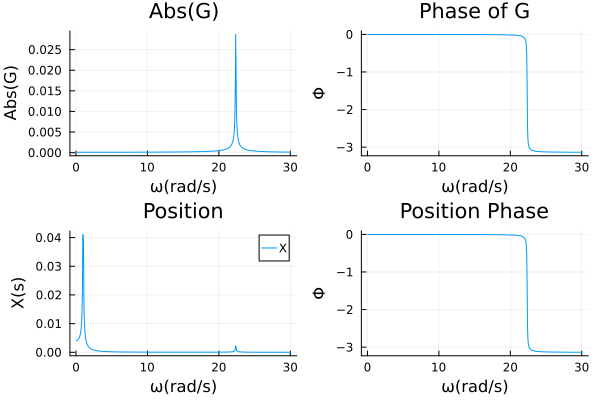

In [115]:
plot1mass(10000,1.5,20,40*sin(t),30)

In [109]:
function build_mck_n_dim(n)
    #this function may be useful to define vectors in n dimensions that can be used in order to implement the code that
    #computes the transfer function starting from the M, C,and K.
    #This considers a vector containing equal elements but can be easily implemented to consider different masses by
    #substituting the elements of a vector to the scalars that are present in the for cycle
m = zeros(n)
c = zeros(n+1)
k = zeros(n+1)

    for i in 1:(n+1)  #c and k vector have n+1 elements while m vector only have n elements

        c[i] = 1.5  # damping coefficients (Ns/m)
        k[i] = 100   # spring constants (N/m)

        if i<=n       
            m[i] = 2   # masses (kg)
        end
    end
end

build_mck_n_dim (generic function with 1 method)